<a href="https://colab.research.google.com/github/Lily1806/TTNT_Nh-m4/blob/main/Nh%C3%B3m04_TTNT_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

drive.mount('/content/drive'


Mounted at /content/drive


In [ ]:

zip_path = '/content/drive/MyDrive/HK4/TTNT/logo_dataset.zip'
extract_path = '/content/logo_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

def remove_corrupt_images(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()
            except:
                os.remove(img_path)

remove_corrupt_images(extract_path)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [ ]:

dataset_path = '/content/logo_dataset/logo_dataset'

#Chuẩn hoá màu ảnh về [0,1] để tăng tốc độ huấn luyện, 80% để huần luyện, 20% để đánh giá
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 75 images belonging to 3 classes.
Found 17 images belonging to 3 classes.


In [ ]:
#Xây dựng mô hình
from tensorflow.keras import layers, models

num_classes = train_generator.num_classes

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,163 (6.61 MB)

 Trainable params: 1,732,163 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Mô hình huấn luyện
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 793ms/step - accuracy: 0.2830 - loss: 1.1092 - val_accuracy: 0.3529 - val_loss: 1.0596
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.5468 - loss: 0.9717 - val_accuracy: 0.4706 - val_loss: 0.9580
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6407 - loss: 0.8860 - val_accuracy: 0.5882 - val_loss: 1.0565
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.6481 - loss: 0.7683 - val_accuracy: 0.5882 - val_loss: 1.0957
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.6504 - loss: 0.7426 - val_accuracy: 0.6471 - val_loss: 1.1122
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 600ms/step - accuracy: 0.6999 - loss: 0.6185 - val_accuracy: 0.5882 - val_loss: 1.1241
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.7941 - loss: 0.5348 - val_accuracy: 0.7059 - val_loss: 1.1562
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 864ms/step - accuracy: 0.8347 - loss: 0.4865 - val_accuracy: 0.7059 - val_loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


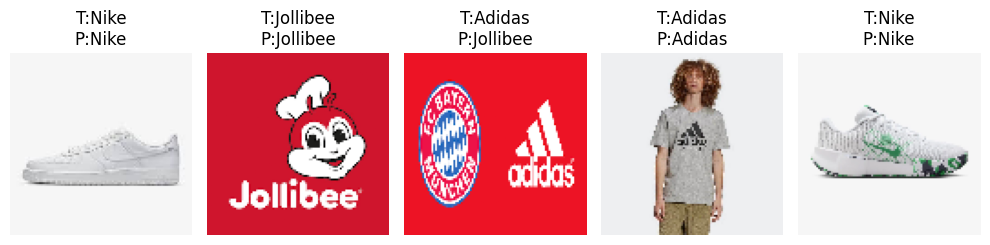

In [ ]:
x_batch, y_batch = next(val_generator)
y_pred = model.predict(x_batch)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_batch, axis=1)

class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.axis("off")
    plt.title(f"T:{class_names[y_true_classes[i]]}\nP:{class_names[y_pred_classes[i]]}")
plt.tight_layout()
plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc*100:.2f}%")

model.save("logo_cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.7647 - loss: 1.2492


Validation accuracy: 76.47%


In [ ]:
Kiến trúc của CNN gồm 7 lớp:
1. Input layer: Tiếp nhận ảnh <ở dạng tensor 3D: chiều cao, rộng, kênh màu>; chuẩn hoá kích thước về dạng pixel [0,1]
2. Lớp tích chập: tích chập giữa dữ liệu đầu vào với bộ lọc filter với kích thước cố định là 3x3 hoặc 5x5
